In [1]:
from platform import python_version

print(python_version())
print("this should be version 3")

3.8.11
this should be version 3


In [2]:
import numpy as np
import scipy as sp
import skimage
import matplotlib.pyplot as plt
import imageio
from glob import glob
from USresamplingutils import *

In [3]:
data_paths = sorted(glob("./.data/*"))

In [4]:
data_paths

['./.data/video_001.mp4', './.data/video_002.mp4']

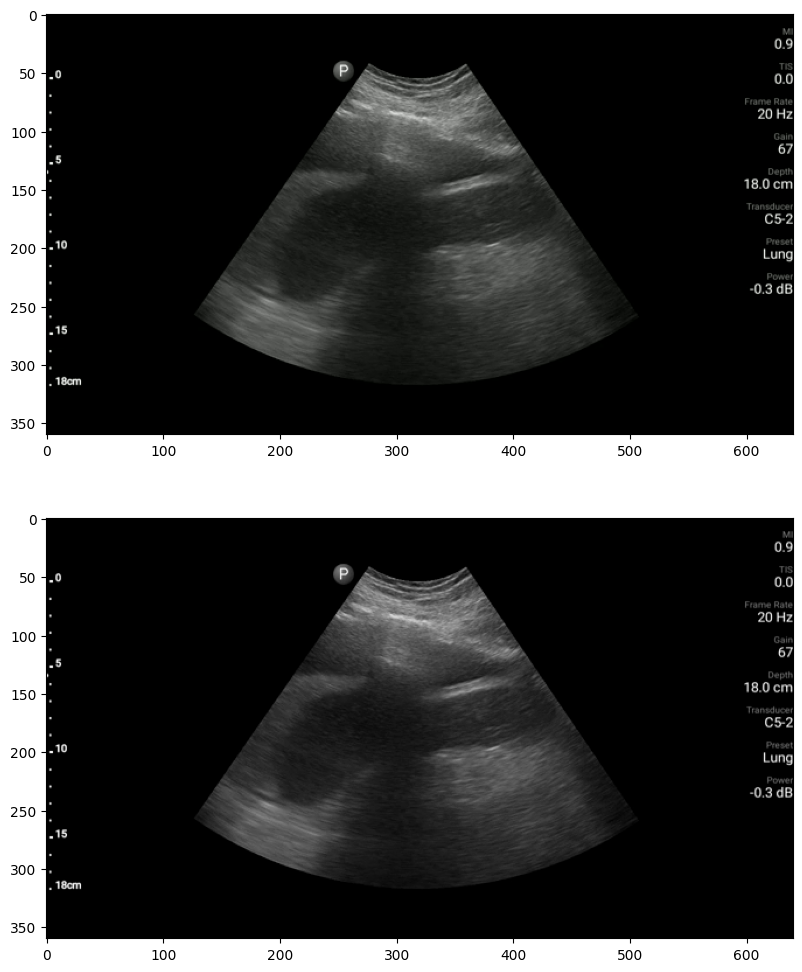

In [5]:
ims = np.zeros((2,360,640,3))

for i in range(len(data_paths)):
    vid = imageio.get_reader(data_paths[i], 'ffmpeg')
    ims[i] = vid.get_data(30)
    
ims = ims / 255

fig, axs = plt.subplots(2)
fig.set_size_inches(15,12)

axs[0].imshow(ims[1])

ocimg = np.mean(ims[1], axis=2)
axs[1].imshow(ocimg, cmap = 'gray')
plt.show()

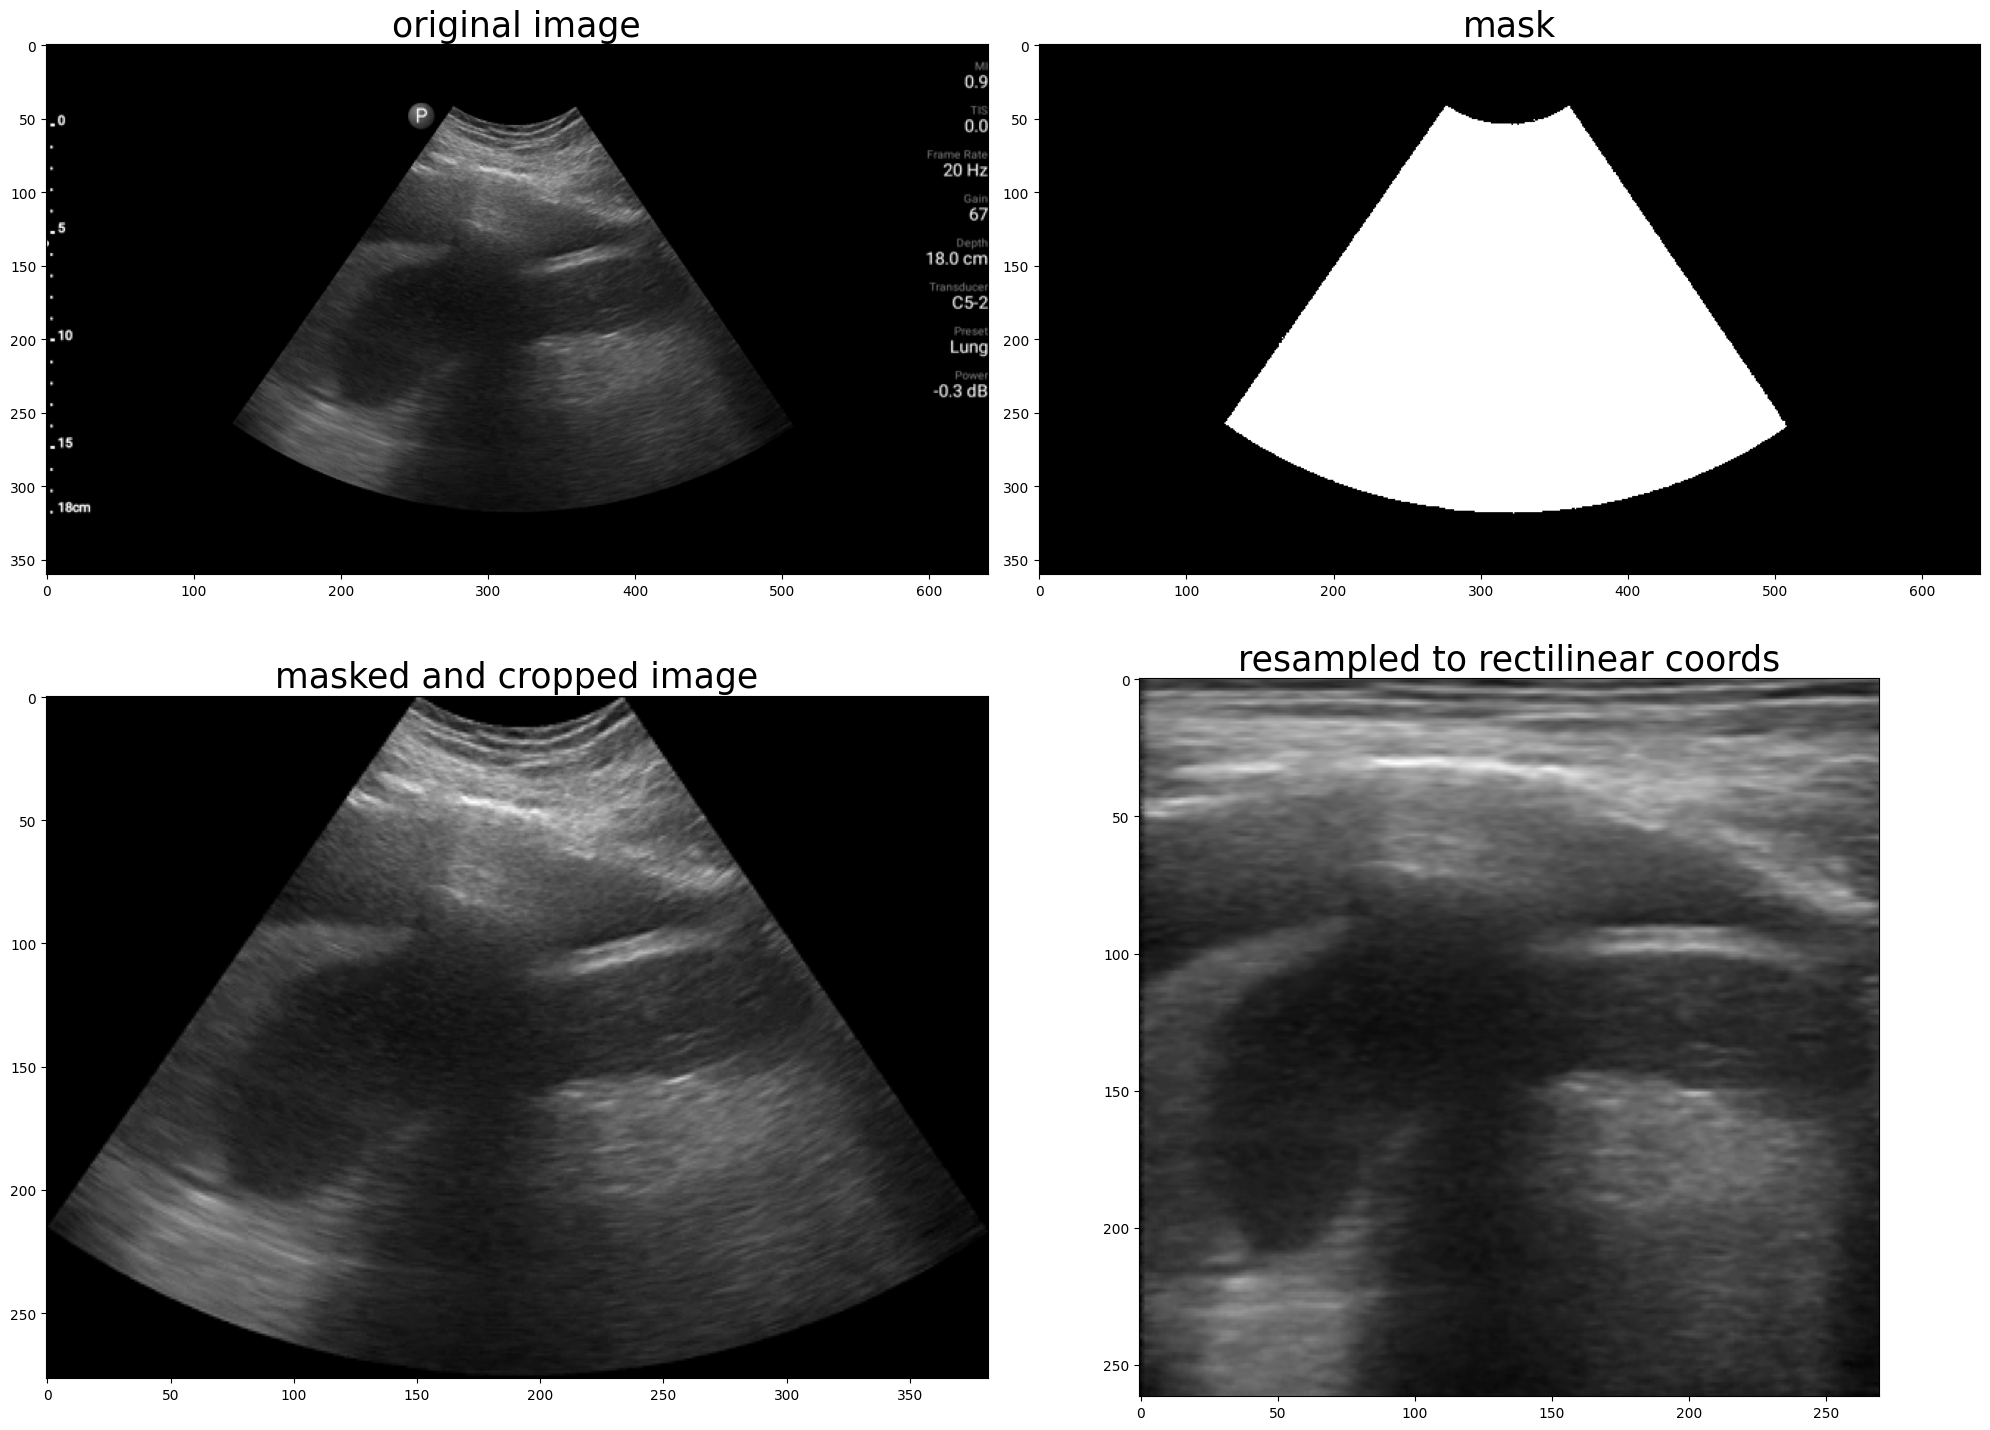

In [6]:
mask = get_US_mask_from_image(ocimg)
img_mapping = get_rectilinear_resampling_map(mask, ray_density = 2/3, blur = 0.3)
resampled_img = get_resampled_image_from_mapping(ocimg, img_mapping)

masked_img = np.zeros(np.shape(ocimg))
masked_img[mask] = ocimg[mask]

true_points = np.argwhere(masked_img)
top_left = true_points.min(axis=0)
bottom_right = true_points.max(axis=0)
cropped_masked_img = masked_img[top_left[0]:bottom_right[0]+1,  # plus 1 because slice isn't
          top_left[1]:bottom_right[1]+1]

fig, axs = plt.subplots(2,2)
fig.set_size_inches(20,15)
axs[0,0].imshow(ocimg, cmap='gray')
axs[0,1].imshow(mask, cmap='gray')
axs[1,0].imshow(cropped_masked_img, cmap='gray')
axs[1,1].imshow(resampled_img, cmap='gray')

axs[0,0].set_title("original image", fontsize = 25)
axs[0,1].set_title("mask", fontsize = 25)
axs[1,0].set_title("masked and cropped image", fontsize = 25)
axs[1,1].set_title("resampled to rectilinear coords", fontsize = 25)

plt.tight_layout()
plt.show()

In [7]:
data_path = './.data/video_001.mp4'

vid = imageio.get_reader(data_path, 'ffmpeg')
frames = []
resampled_frames = []

for i, im in enumerate(vid):
    ocimg = np.mean(im, axis=2)
    masked_img = np.zeros(np.shape(ocimg))
    masked_img[mask] = ocimg[mask]
    true_points = np.argwhere(masked_img)
    top_left = true_points.min(axis=0)
    bottom_right = true_points.max(axis=0)
    cropped_masked_img = masked_img[top_left[0]:bottom_right[0]+1,
                                    top_left[1]:bottom_right[1]+1]
    frames.append(cropped_masked_img)
    resampled_img = get_resampled_image_from_mapping(ocimg, img_mapping)
    resampled_frames.append(resampled_img)
    
#     fig, axs = plt.subplots(1,2)
#     fig.set_size_inches(10,15)
#     axs[0].imshow(ocimg, cmap='gray')
#     axs[1].imshow(resampled_img, cmap='gray')
    
#     plt.tight_layout()    
    
num_frames = i + 1